In [201]:
#%run Data_Wrangling_Capstone_Two-Copy4.ipynb

In [202]:
#%run Exploratory_Data_Analysis_Capstone2.ipynb

In [203]:
#%run Capstone_Two_Pre-processing_and_Training_Data_Development.ipynb

In [204]:
#%run Modeling_Capstone_Two.ipynb

In [197]:
#To make use of the train_test_split function, first we must do an import from sklearn.model_selection
#To use the Support Vector Classifier, we must import the classifier from sklearn.svm
#To get a view of the metric readings and proper prediction diagram display, we must import classification_report and 
#confusion_matrix from sklearn.metrics

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [198]:
#Our objective is to figure out what development class a region falls under based upon four features of the original
#dataset: Total; Female; Male: Rural_Residence; Urban_Residence. We will be using the Development Regions feature as our
#class identifier. This is a multiclass classification problem and we will be making use of the kernel SVM as this makes
#SVM which is usually employed for binary classification, into a multiclass classifier.

sdf2 = super_data_frame.drop(columns=['ISO3', 'Countries and areas', 'Region', 'Sub-region', 'Poorest_Wealth quintile',
                                     'Second_Wealth quintile', 'Middle_Wealth quintile', 'Fourth_Wealth quintile',
                                     'Richest_Wealth quintile', 'Data source', 'Time period']).dropna(how='any')

In [199]:
#Splitting the data into X and y variables to be used in the train_test_split; the X variable holds the features with the
#numerical data to predict the categories in the y variable which holds the feature with labels.
#As seen in the previous step and dependent on the features one wishes to single out and use, some preprocessing is required
#of the data set such as dropping unnecessary features(columns) and making sure to drop any null values as the SVM cannot 
#use or recognize these values; it also interferes with the functioning of the classifier.
#For the X variable, the drop method is used to drop any columns we will not use for that data set and setting the axis
#parameter to 0 or 1; 0 = rows and 1 = columns.

X = sdf2.drop('Development Regions', axis=1)
y = sdf2['Development Regions']

In [ ]:
#I decided to go with the Kernel SVM model as the data I'm working with to address the problem identification is best 
#suited for an algorithm built for non-linearly separable data that is multiclass. 

In [ ]:
#Splitting the X and y variables into train and test sets with the train_test_split function, and setting the test_size to 
#20% of dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
#Gaussian kernel
#To use the Gaussian kernel, the kernel parameter in the SVC function must be set to 'rbf'.
#Need to use the fit method to fit the SVM model according to the data.

svclassifier2 = SVC(kernel='rbf')
svclassifier2.fit(X_train, y_train);

In [10]:
#Making our prediction based on the X_test set. Also, need to use predict method of SVM object to do this.
#Evaluations for the Gaussian kernel - The Gaussian kernel was overall the best in performance for the dataset as it 
#achieves the highest scores and best classifications throughout.
#The confusion_matrix function takes the y test and y prediction and outputs the mini-diagram below to illustrate the 
#prediction performance of the model.
#The classification_report also takes the y test and y prediction and outputs various metric scores of the model 
#performance; most notably precision, recall, f1-score, and accuracy.
#The zero_division parameter was used in the classification_report function to set a value to return in case of zero 
#division.

y_pred = svclassifier2.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

[[15  4  0]
 [10 26  0]
 [ 0 10  0]]
                 precision    recall  f1-score   support

Least Developed       0.60      0.79      0.68        19
 Less Developed       0.65      0.72      0.68        36
 More Developed       1.00      0.00      0.00        10

       accuracy                           0.63        65
      macro avg       0.75      0.50      0.46        65
   weighted avg       0.69      0.63      0.58        65



In [23]:
#I conducted three more runs of the SVM with 3 hypothetical data sets (really just rearranging the data set into its
#original data sets), to verify the performance of the classifier which actually improved its prediction accuracy
#throught with the same associated features.
#This is the first hypothetical data set using lower secondary school students' drop-out rate data.

df1 = df_1.drop(columns=['ISO3', 'Countries and areas', 'Region', 'Sub-region', 'Poorest_Wealth quintile',
                        'Second_Wealth quintile','Middle_Wealth quintile', 'Fourth_Wealth quintile',
                        'Richest_Wealth quintile', 'Data source', 'Time period']).dropna(how='any')

In [26]:
X1 = df1.drop('Development Regions', axis=1)
y1 = df1['Development Regions']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

In [200]:
svclassifier1 = SVC(kernel='rbf')
svclassifier1.fit(X_train, y_train);

In [173]:
y_pred1 = svclassifier1.predict(X_test)

In [174]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1, zero_division=1))

[[ 5  1  0]
 [ 3 12  0]
 [ 0  1  0]]
                 precision    recall  f1-score   support

Least Developed       0.62      0.83      0.71         6
 Less Developed       0.86      0.80      0.83        15
 More Developed       1.00      0.00      0.00         1

       accuracy                           0.77        22
      macro avg       0.83      0.54      0.51        22
   weighted avg       0.80      0.77      0.76        22



In [32]:
#Second run of the hypothetical data sets; the primary students' school drop-out rate data set.

df2 = df_2.drop(columns=['ISO3', 'Countries and areas', 'Region', 'Sub-region', 'Poorest_Wealth quintile',
                        'Second_Wealth quintile', 'Middle_Wealth quintile', 'Fourth_Wealth quintile',
                        'Richest_Wealth quintile', 'Data source', 'Time period']).dropna(how='any')

In [35]:
X2 = df2.drop('Development Regions', axis=1)
y2 = df2['Development Regions']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

In [180]:
svclassifier2 = SVC(kernel='rbf')
svclassifier2.fit(X_train, y_train);

In [181]:
y_pred2 = svclassifier2.predict(X_test)

In [182]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2, zero_division=1))

[[ 6  4  0]
 [ 1 10  0]
 [ 0  1  0]]
                 precision    recall  f1-score   support

Least Developed       0.86      0.60      0.71        10
 Less Developed       0.67      0.91      0.77        11
 More Developed       1.00      0.00      0.00         1

       accuracy                           0.73        22
      macro avg       0.84      0.50      0.49        22
   weighted avg       0.77      0.73      0.71        22



In [42]:
#Third run of the hypothetical data sets'; the upper secondary students' school drop-out rate data set.

df3 = df_3.drop(columns=['ISO3', 'Countries and areas', 'Region', 'Sub-region', 'Poorest_Wealth quintile',
                        'Second_Wealth quintile', 'Middle_Wealth quintile', 'Fourth_Wealth quintile',
                        'Richest_Wealth quintile', 'Data source', 'Time period']).dropna(how='any')

In [45]:
X3 = df3.drop('Development Regions', axis=1)
y3 = df3['Development Regions']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2)

In [192]:
svclassifier3 = SVC(kernel='rbf')
svclassifier3.fit(X_train, y_train);

In [193]:
y_pred3 = svclassifier3.predict(X_test)

In [194]:
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3, zero_division=1))

[[ 4  2  0]
 [ 2 12  0]
 [ 0  2  0]]
                 precision    recall  f1-score   support

Least Developed       0.67      0.67      0.67         6
 Less Developed       0.75      0.86      0.80        14
 More Developed       1.00      0.00      0.00         2

       accuracy                           0.73        22
      macro avg       0.81      0.51      0.49        22
   weighted avg       0.75      0.73      0.69        22



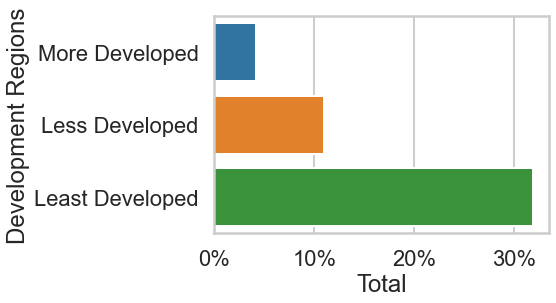

In [116]:
#To use the barplot, need to import seaborn. Seaborn was imported under the alias 'sns'.
#With the barplot function, we set the barplot to a horizontal display by using the x paramter to be the feature with the
#numerical data and the y paramter to be the feature with the labels to better display the info on the barplot clearly and
#legibly. I used the 'development regions' as the independent variable and the 'total' as the dependent variable to 
#illustrate the average percentage of school drop-out rates for each of these development regions.
#I made use of the ci parameter of the barplot to remove any confidence interval bars in the chart.
#Imported matplotlib.ticker as mtick to make use of its percent formatter function to set the ticks with percentage
#symbols and used its decimals parameter to remove any decimal formatted numbers.

import matplotlib.ticker as mtick
ax = sns.barplot(x='Total', y='Development Regions', data=sdf2, order=['More Developed', 'Less Developed',
                'Least Developed'], ci=None);
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

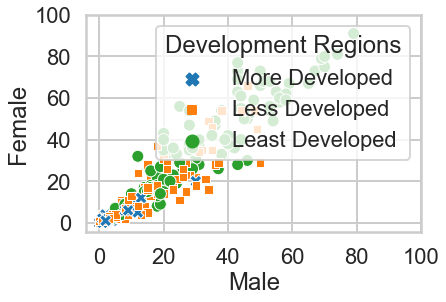

In [117]:
#legend=False; Reminder to remove legend if needed
#Need to import seaborn to use the scatterplot function. Can import it under an alias; here, it's sns.
#I used the Male feature as the argument for the x parameter and the Female feature as the argument for the y parameter. I
#used the Male feature as the independent variable and the Female feature as the dependent variable to illustrate the 
#disparity between the two demographics; female students tend to be more adversely affected.
#The hue parameter was assigned to the 'Development Regions' feature as an additional dimension to provide more in-depth 
#insight and the style parameter was assigned the same argument as hue to make the graphics more accessible to the reader.
#Need to import matplotlib. Here we imported it under the alias 'plt'.
#I made use of the xticks and yticks function to make sure the x and y planes were equally labeled and to clearly display
#the contrast between the two variables.

sns.scatterplot(data=sdf2, x='Male', y='Female', hue='Development Regions', style='Development Regions',
               hue_order=['More Developed', 'Less Developed', 'Least Developed']);
plt.xticks(ticks=[0, 20, 40, 60, 80, 100]);
plt.yticks(ticks=[0, 20, 40, 60, 80, 100]);

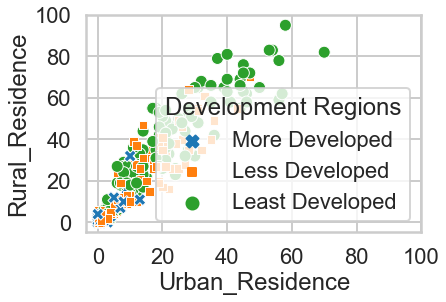

In [118]:
#legend=False; Reminder to remove legend if needed
#As in the previous step, need to import seaborn and matplotlib.
#For this second scatterplot, we assigned the x parameter to the 'Urban_Residence' and the y parameter to the
#'Rural_Residence'. The urban residence feature is used as the independent variable and the rural residence feature is used
#as the dependent variable to show the contrast between the two variables. As the chart illustrates, the rural residences
#are more likely to suffer from school drop-out than urban residences.
#The 'Development Regions' feature was added as an argument for the hue parameter to provide more in-depth analysis to 
#infer from and the style paramter was assigned the same argument/feature to make the chart more accessible and legible for
#the reader.

sns.scatterplot(data=sdf2, x='Urban_Residence', y='Rural_Residence', hue='Development Regions',
                style='Development Regions', hue_order=['More Developed', 'Less Developed', 'Least Developed']);
plt.xticks(ticks=[0, 20, 40, 60, 80, 100]);
plt.yticks(ticks=[0, 20, 40, 60, 80, 100]);